In [1]:
#pip install pandas-datareader

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib

Using matplotlib backend: Qt5Agg


In [3]:
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2021,1,1)

In [4]:
JPM = data.DataReader('JPM', 'yahoo', start, end)
PNC = data.DataReader('PNC', 'yahoo', start, end)
RF = data.DataReader('RF', 'yahoo', start, end)
SNV = data.DataReader('SNV', 'yahoo', start, end)
TFC = data.DataReader('TFC', 'yahoo', start, end)
WFC = data.DataReader('WFC', 'yahoo', start, end)

In [5]:
tickers = ['JPM', 'PNC', 'RF', 'SNV', 'TFC', 'WFC']

In [6]:
bank_stocks = pd.concat([JPM, PNC, RF, SNV, TFC, WFC], axis=1, keys=tickers)

In [7]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [8]:
bank_stocks.head()

Bank Ticker        JPM                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2011-01-03   44.040001  42.959999  43.000000  43.580002  43278500.0   
2011-01-04   44.299999  43.340000  43.779999  44.160000  40036800.0   
2011-01-05   44.950001  43.900002  43.919998  44.700001  50032500.0   
2011-01-06   44.799999  44.250000  44.400002  44.480000  31606200.0   
2011-01-07   44.590000  42.650002  44.540001  43.639999  69579400.0   

Bank Ticker                   PNC                                   ...  \
Stock Info   Adj Close       High        Low       Open      Close  ...   
Date                                                                ...   
2011-01-03   32.757996  61.919998  61.290001  61.290001  61.459999  ...   
2011-01-04   33.232086  61.889999  60.130001  61.669998  60.630001  ...   
2011-01-05   33.638466  61.849998  60.480000  60.650002  61.799999  ...   
2011-01-06   33.472908  63.180000  61.450001  61.709999  62.279999  ...   
2011-01-07   32.840771  62.700001  61.110001  62.529999  61.939999  ...   

Bank Ticker        TFC                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2011-01-03   26.639999  26.870001  6263700.0  19.511986  31.660000  31.160000   
2011-01-04   27.000000  26.840000  6459200.0  19.490200  31.940001  31.490000   
2011-01-05   26.600000  27.469999  7948500.0  20.059786  32.500000  31.400000   
2011-01-06   27.320000  26.889999  7012600.0  19.636240  32.470001  32.119999   
2011-01-07   26.730000  26.330000  7239300.0  19.227308  32.230000  30.639999   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2011-01-03   31.299999  31.580000  34397100.0  23.417738  
2011-01-04   31.650000  31.650000  30341100.0  23.469646  
2011-01-05   31.410000  32.369999  43245600.0  24.003551  
2011-01-06   32.150002  32.150002  32500000.0  23.840412  
2011-01-07   32.230000  31.500000  81572300.0  23.358408  

[5 rows x 36 columns]

In [9]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
JPM    141.089996
PNC    162.449997
RF      20.110001
SNV     57.070000
TFC     56.720001
WFC     65.930000
dtype: float64

In [10]:
returns = pd.DataFrame()

In [11]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [12]:
returns.head()

,JPM Return,PNC Return,RF Return,SNV Return,TFC Return,WFC Return
Date,,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,0.013309,-0.013505,-0.005658,0.000000,-0.001117,0.002217
2011-01-05,0.012228,0.019297,0.025605,-0.010989,0.023472,0.022749
2011-01-06,-0.004922,0.007767,-0.009709,0.000000,-0.021114,-0.006796
2011-01-07,-0.018885,-0.005459,-0.016807,-0.055556,-0.020826,-0.020218


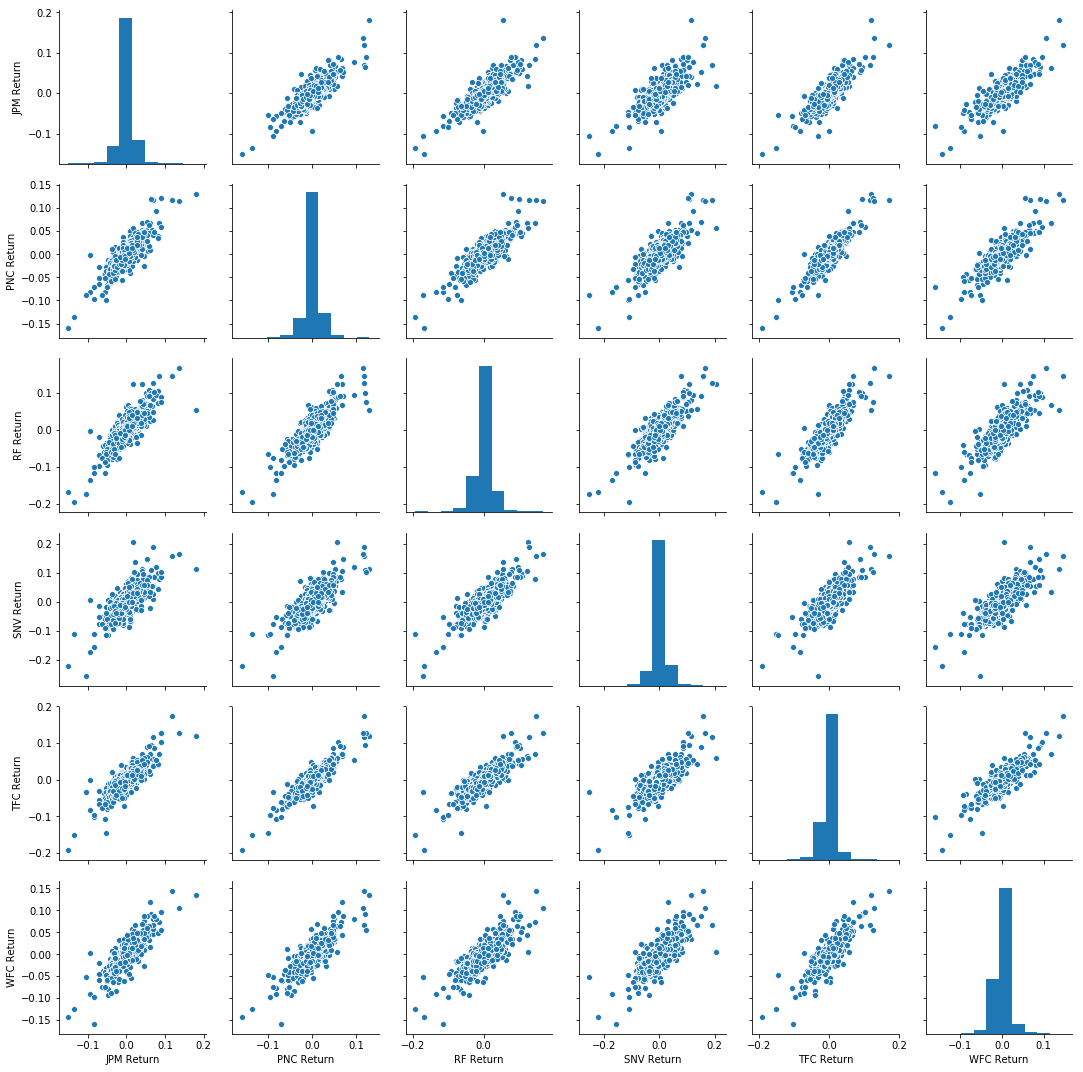

In [13]:
sns.pairplot(returns[1:])

In [14]:
returns.idxmin()

JPM Return   2020-03-16
PNC Return   2020-03-16
RF Return    2020-03-09
SNV Return   2020-03-18
TFC Return   2020-03-16
WFC Return   2020-03-12
dtype: datetime64[ns]

In [15]:
returns.idxmax()

JPM Return   2020-03-13
PNC Return   2020-03-13
RF Return    2020-11-09
SNV Return   2020-03-19
TFC Return   2020-03-24
WFC Return   2020-03-24
dtype: datetime64[ns]

In [16]:
returns.std()

JPM Return    0.018146
PNC Return    0.017566
RF Return     0.023768
SNV Return    0.025676
TFC Return    0.018853
WFC Return    0.018275
dtype: float64

In [17]:
returns.loc['2020-01-01':'2020-12-31'].std()

JPM Return    0.034272
PNC Return    0.036337
RF Return     0.044360
SNV Return    0.054351
TFC Return    0.041815
WFC Return    0.038573
dtype: float64

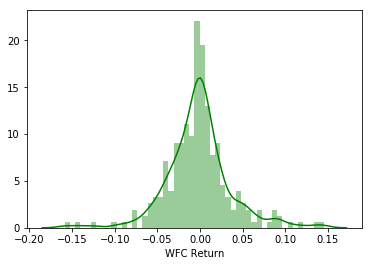

In [18]:
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['WFC Return'], color='green', bins=50)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

import plotly
import cufflinks as cf
cf.go_offline()

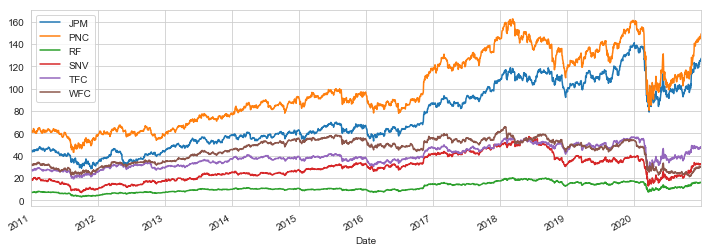

In [20]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

In [21]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

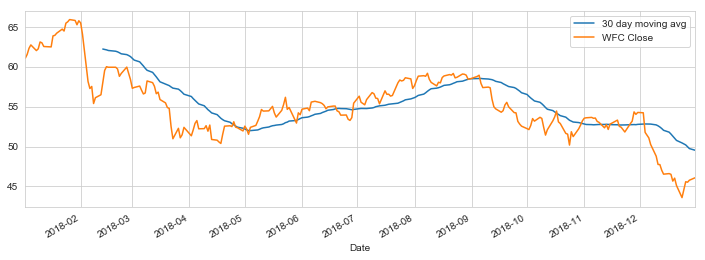

In [22]:
plt.figure(figsize=(12,4))
WFC['Close'].loc['2018-01-01':'2018-12-31'].rolling(window=30).mean().plot(label='30 day moving avg')
WFC['Close'].loc['2018-01-01':'2018-12-31'].plot(label='WFC Close')
plt.legend()

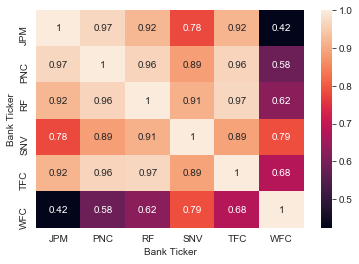

In [23]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

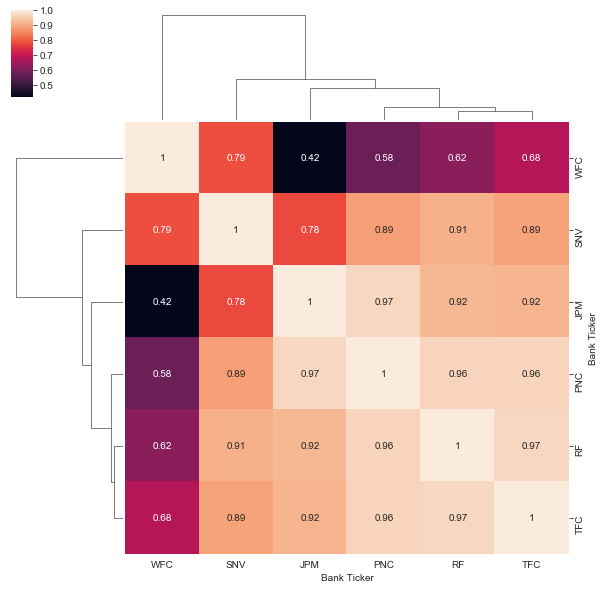

In [24]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

In [25]:
close_corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

In [26]:
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

In [27]:
wfc18 = WFC[['Open', 'High', 'Low', 'Close']].loc['2018-01-01':'2019-01-01']
wfc18.iplot(kind='candle')

In [28]:
PNC['Close'].loc['2018-01-01':'2019-01-01'].ta_plot(study='sma', periods=[13,21,55])

In [34]:
WFC['Close'].loc['2017-01-01':'2018-01-01'].ta_plot(study='boll')